# Day 7 naive Bayes classifiers

## Bayesian Classification
朴素贝叶斯分类器建立在贝叶斯分类方法的基础上，其数学基础是贝叶斯定理(Bayes’s theorem)——一个描述统计量条件概率关系的公式。在贝叶斯分类中，我们希望确定一个 具有某些特征的样本属于某类标签的概率，通常记为 P (L | 特征 )。
$$P(L|特征) = \frac{P(特征|L)P(L)}{P(特征)}$$
之所以称为“朴素”或“朴素贝叶斯”，是因为如果对每种标签的生成模型进行非常简单 的假设，就能找到每种类型生成模型的近似解，然后就可以使用贝叶斯分类。

最容易理解的朴素贝叶斯分类器可能就是高斯朴素贝叶斯(Gaussian naive Bayes)了， 这个分类器假设每个标签的数据都服从简单的高斯分布。

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

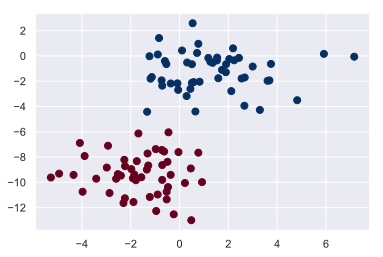

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5) #n_samples, n_features, centers, cluster_std, center_box
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

## 高斯朴素贝叶斯 Gaussian native Bayes
一种快速创建简易模型的方法就是假设数据服从高斯分布，且变量无协方差(no covariance，指线性无关)。只要找出每个标签的所有样本点均值和标准差，再定义一个高 斯分布，就可以拟合模型了。

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

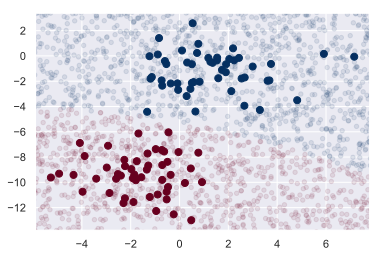

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
model.fit(X, y)
#预测数据
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
#画图
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

可以在分类结果中看到一条稍显弯曲的边界——通常，高斯朴素贝叶斯的边界是二次方曲线。
<br>贝叶斯主义(Bayesian formalism)的一个优质特性是它天生支持概率分类，我们可以用
predict_proba 方法计算样本属于某个标签的概率:

In [4]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2) # 这个数组分别给出了前两个标签的后验概率

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## 多项式朴素贝叶斯 multinomial naive Bayes
它假设特征是由一个简单多项式分 布生成的。多项分布可以描述各种类型样本出现次数的概率，因此多项式朴素贝叶斯非常 适合用于描述出现次数或者出现次数比例的特征。
<br>多项式朴素贝叶斯通常用于文本分类，其特征都是指待分类文本的单词出现次数或者频 次。
<br>详例见*Day 4 Exploring Hand-written Digits*

## 朴素贝叶斯的应用场景
由于朴素贝叶斯分类器对数据有严格的假设，因此它的训练效果通常比复杂模型的差。其
优点主要体现在以下四个方面。
<br>
* 训练和预测的速度非常快。
* 直接使用概率预测。
* 通常很容易解释。
* 可调参数(如果有的话)非常少。

这些优点使得朴素贝叶斯分类器通常很适合作为分类的初始解。如果分类效果满足要求， 那么万事大吉，你获得了一个非常快速且容易解释的分类器。但如果分类效果不够好，那 么你可以尝试更复杂的分类模型，与朴素贝叶斯分类器的分类效果进行对比，看看复杂模 型的分类效果究竟如何。
<br>
朴素贝叶斯分类器非常适合用于以下应用场景。
* 假设分布函数与数据匹配(实际中很少见)。 
* 各种类型的区分度很高，模型复杂度不重要。 
* 非常高维度的数据，模型复杂度不重要。

后面两条看似不同，其实彼此相关:随着数据集维度的增加，任何两点都不太可能逐渐靠 近(毕竟它们得在每一个维度上都足够接近才行)。也就是说，在新维度会增加样本数据 信息量的假设条件下，高维数据的簇中心点比低维数据的簇中心点更分散。因此，随着数 据维度不断增加，像朴素贝叶斯这样的简单分类器的分类效果会和复杂分类器一样，甚至 更好——只要你有足够的数据，简单的模型也可以非常强大。